In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
import tensorflow as tf

def dagger_plot(file):
    return get_section_results('Eval_AverageReturn')

def get_section_results(file, s):
    eval_returns = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == s:
                eval_returns.append(v.simple_value)
    return eval_returns

# Ant
```
python cs285/scripts/run_hw1.py --expert_policy_file cs285/policies/experts/Ant.pkl --env_name Ant-v2 --exp_name bc_ant --n_iter 1 --expert_data cs285/expert_data/expert_data_Ant-v2.pkl --no_gpu  
```

In [11]:
get_section_results('data/q1_bc_ant/events.out.tfevents.1600215580.kevin-desktop','Eval_AverageReturn')

[3697.060302734375]

# Hopper
```
python cs285/scripts/run_hw1.py --expert_policy_file cs285/policies/experts/Hopper.pkl --env_name Hopper-v2 --exp_name bc_hopper --n_iter 1 --expert_data cs285/expert_data/expert_data_Hopper-v2.pkl --no_gpu
```


Changing n layers

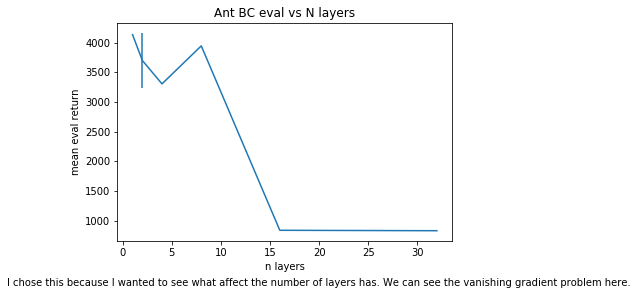

In [62]:
n_layers = [1,2,4,8,16,32]
means = [4132.8,3697.1, 3302.9, 3943.3,835.5, 828.2]
std = [0,462.4, 0, 0, 0, 0]
plt.xlabel('n layers')
plt.ylabel('mean eval return')
plt.errorbar(n_layers, means, yerr=std, errorevery=1)
plt.title('Ant BC eval vs N layers')
plt.text(20, -100, 'I chose this because I wanted to see what affect the number of layers has. We can see the vanishing gradient problem here.', ha='center')

plt.show()

# Ant DAgger

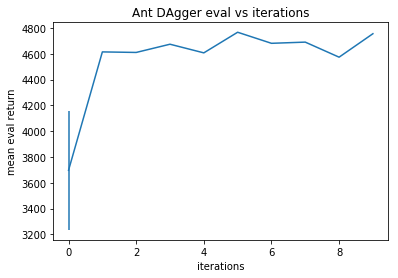

In [45]:
means = get_section_results('data/q2_dagger_ant/events.out.tfevents.1600215505.kevin-desktop','Eval_AverageReturn')
std = get_section_results('data/q2_dagger_ant/events.out.tfevents.1600215505.kevin-desktop','Eval_StdReturn')

plt.xlabel('iterations')
plt.ylabel('mean eval return')
plt.errorbar(np.arange(10), means, yerr=std, errorevery=1)
plt.title('Ant DAgger eval vs iterations')

plt.show()

# Hopper DAgger

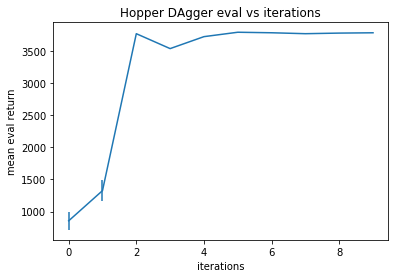

In [46]:
means = get_section_results('data/q2_dagger_hopper/events.out.tfevents.1600215956.kevin-desktop','Eval_AverageReturn')
std = get_section_results('data/q2_dagger_hopper/events.out.tfevents.1600215956.kevin-desktop','Eval_StdReturn')

plt.xlabel('iterations')
plt.ylabel('mean eval return')
plt.errorbar(np.arange(10), means, yerr=std, errorevery=1, markeredgewidth=10)
plt.title('Hopper DAgger eval vs iterations')

plt.show()